In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from lib.dataset_wrapper import Dataset
from lib import abx_utils

In [2]:
DATASETS_NAME = ["pb2007", "fsew0"]

In [10]:
def get_phones_contexts(items_lab, phones, contexts):
    phones_indexes = {phone: [] for phone in phones}

    for item_name, item_lab in items_lab.items():
        if len(item_lab) < 3:
            continue
        lab_len = len(item_lab)
        for i in range(lab_len - 2):
            if (
                item_lab[i]["name"] in contexts
                and item_lab[i + 1]["name"] in phones
                and item_lab[i + 2]["name"] in contexts
            ):
                phone_label = item_lab[i + 1]
                phone_name = phone_label["name"]
                phones_indexes[phone_name].append((item_lab[i]["name"], item_lab[i + 2]["name"]))

    return phones_indexes

In [15]:
datasets_contexts = {}
datasets_vowels = {}

for dataset_name in DATASETS_NAME:
    dataset = Dataset(dataset_name)

    consonants = dataset.phones_infos["consonants"]
    vowels = dataset.phones_infos["vowels"]
    
    datasets_vowels[dataset_name] = vowels

    consonants_contexts = get_phones_contexts(
        dataset.lab,
        consonants,
        vowels,
    )
    datasets_contexts[dataset_name] = consonants_contexts

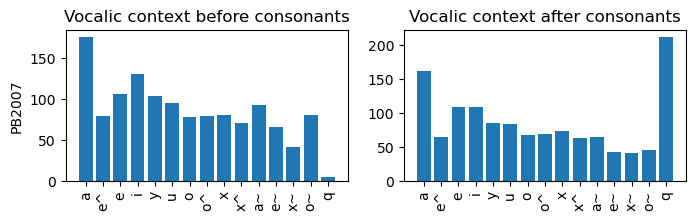

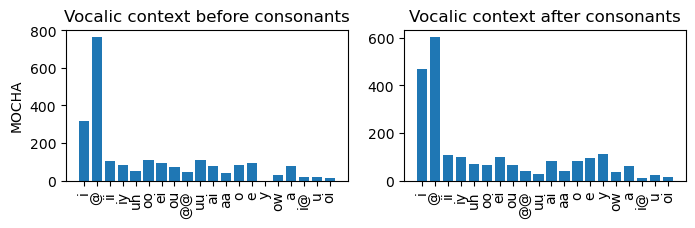

In [35]:
datasets_title = {
    "pb2007": "PB2007",
    "fsew0": "MOCHA",
}

for dataset_name in DATASETS_NAME:
    consonants_contexts = datasets_contexts[dataset_name]
    vowels = datasets_vowels[dataset_name]
    nb_vowels = len(vowels)
    
    prev_count = np.zeros(nb_vowels)
    next_count = np.zeros(nb_vowels)
    
    for consonant_name, consonant_contexts in consonants_contexts.items():
        for prev_vowel, next_vowel in consonant_contexts:
            prev_index = vowels.index(prev_vowel)
            next_index = vowels.index(next_vowel)
            prev_count[prev_index] += 1
            next_count[next_index] += 1

    vowels_range = np.arange(nb_vowels)
    
    plt.figure(figsize=(8, 2), dpi=100)
    for i_pos, pos_count in enumerate((prev_count, next_count)):
        ax = plt.subplot(1, 2, 1 + i_pos)
        
        if i_pos == 0:
            ax.set_ylabel(datasets_title[dataset_name])
            ax.set_title("Vocalic context before consonants")
        else:
            ax.set_title("Vocalic context after consonants")
        
        ax.set_xticks(vowels_range, vowels, rotation=90)
        
        ax.bar(vowels_range, pos_count)
    plt.show()